In [1]:
import tensorflow as tf
import numpy as np 

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt

In [2]:
#Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

# using 1000 data for test
X_train=X_train[:1000]
Y_train=Y_train[:1000]

# using 300 data for test
X_test=X_test[:300]
Y_test=Y_test[:300]

print(X_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(1000, 28, 28)


In [3]:
n_samples = X_train.shape[0]

X_rotate= np.zeros(shape=(n_samples*4,X_train.shape[1],X_train.shape[2]))
Y_rotate =np.zeros(shape=(n_samples*4,4))

for i in range(n_samples):
    
    img =X_train[i]
    
    
    X_rotate[4*i-4]=img
    Y_rotate[4*i-4]=[1,0,0,0] 
    
    # 90degree rotation: Transpose + Vertical flip
    X_rotate[4*i-3]=np.flip(img.T,0)
    Y_rotate[4*i-3]=[0,1,0,0] 
    
    # 180degree rotation: Vertical flip + Horizontal flip
    X_rotate[4*i-2]=np.flip(np.flip(img,0),1)
    Y_rotate[4*i-2]=[0,0,1,0] 
    
    # 270degree rotation: Vertical flip + Transpose
    X_rotate[4*i-1]=np.flip(img,0).T
    Y_rotate[4*i-1]=[0,0,0,1] 

(-0.5, 27.5, 27.5, -0.5)

<Figure size 432x288 with 0 Axes>

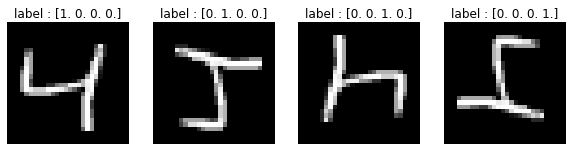

In [4]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)
plt.subplots(figsize=(10, 10))

plt.subplot(141)
plt.imshow(X_rotate[4], cmap = 'gray')
plt.title('label : ' + str(Y_rotate[4]))
plt.axis('off') 

plt.subplot(142)
plt.imshow(X_rotate[5], cmap = 'gray')
plt.title('label : ' + str(Y_rotate[5]))
plt.axis('off') 

plt.subplot(143)
plt.imshow(X_rotate[6], cmap = 'gray')
plt.title('label : ' + str(Y_rotate[6]))
plt.axis('off') 

plt.subplot(144)
plt.imshow(X_rotate[7], cmap = 'gray')
plt.title('label : ' +str(Y_rotate[7]))
plt.axis('off') 

In [5]:
# reshape MNIST image data for convolution
print(X_rotate[0].shape)
X_rotate =X_rotate.reshape(-1,28,28,1)

(28, 28)


In [6]:
layer1 = Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same',
                activation='relu',kernel_initializer='random_normal')
layer2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
layer3 = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
                activation='relu' ,kernel_initializer='random_normal')
layer4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
layer5 = Conv2D(16, kernel_size=(3, 3), strides=(2, 2), padding='same',
                activation='relu',kernel_initializer='random_normal')

layer6 = Flatten()
layer7= Dense(4, activation='softmax',kernel_initializer='random_normal')

model_pre = Sequential([keras.Input(shape=(28,28,1)), 
                          layer1, layer2, layer3,layer4,layer5,
                          layer6,layer7])
model_pre.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 64)                0

In [7]:
sgd = keras.optimizers.SGD(learning_rate = 0.001,momentum = 0.9)
model_pre.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
hist= model_pre.fit(X_rotate, Y_rotate, batch_size = 192, epochs = 50,verbose = 2, shuffle=False)

Epoch 1/50
21/21 - 12s - loss: 1.6094 - accuracy: 0.3618 - 12s/epoch - 574ms/step
Epoch 2/50
21/21 - 0s - loss: 0.7733 - accuracy: 0.6835 - 95ms/epoch - 5ms/step
Epoch 3/50
21/21 - 0s - loss: 0.5159 - accuracy: 0.8167 - 87ms/epoch - 4ms/step
Epoch 4/50
21/21 - 0s - loss: 0.3611 - accuracy: 0.8788 - 93ms/epoch - 4ms/step
Epoch 5/50
21/21 - 0s - loss: 0.2787 - accuracy: 0.9070 - 85ms/epoch - 4ms/step
Epoch 6/50
21/21 - 0s - loss: 0.2266 - accuracy: 0.9215 - 83ms/epoch - 4ms/step
Epoch 7/50
21/21 - 0s - loss: 0.1920 - accuracy: 0.9385 - 106ms/epoch - 5ms/step
Epoch 8/50
21/21 - 0s - loss: 0.1653 - accuracy: 0.9475 - 115ms/epoch - 5ms/step
Epoch 9/50
21/21 - 0s - loss: 0.1444 - accuracy: 0.9532 - 133ms/epoch - 6ms/step
Epoch 10/50
21/21 - 0s - loss: 0.1392 - accuracy: 0.9538 - 98ms/epoch - 5ms/step
Epoch 11/50
21/21 - 0s - loss: 0.1428 - accuracy: 0.9490 - 88ms/epoch - 4ms/step
Epoch 12/50
21/21 - 0s - loss: 0.1491 - accuracy: 0.9457 - 93ms/epoch - 4ms/step
Epoch 13/50
21/21 - 0s - loss: 0

In [8]:
# Freeze the pretext model
model_pre.trainable=False

In [9]:
X_train =X_train.reshape(-1,28,28,1)
X_test =X_test.reshape(-1,28,28,1)
Y_train = tf.one_hot(Y_train, 10,on_value=1.0, off_value=0.0)
Y_test = tf.one_hot(Y_test, 10,on_value=1.0, off_value=0.0)

In [10]:
layer9=Flatten()
layer10 = Dense(10,activation = 'softmax',kernel_initializer='random_normal') 
# new layer to classify 10 numbers

model_down = keras.Sequential([keras.Input(shape=(28,28,1)), 
                           layer1, layer2, layer3,layer4,layer9,layer10])
model_down.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=7)
#validation_split for training
split = 0.3

In [12]:
model_down.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
hist_down= model_down.fit(X_train, Y_train, batch_size = 64, validation_split = split,
                  epochs = 50,verbose = 2, callbacks = callback)

Epoch 1/50
11/11 - 1s - loss: 108.9603 - accuracy: 0.1286 - val_loss: 199.8971 - val_accuracy: 0.0933 - 851ms/epoch - 77ms/step
Epoch 2/50
11/11 - 0s - loss: 104.5386 - accuracy: 0.2957 - val_loss: 45.9247 - val_accuracy: 0.4400 - 55ms/epoch - 5ms/step
Epoch 3/50
11/11 - 0s - loss: 26.4802 - accuracy: 0.5557 - val_loss: 31.7799 - val_accuracy: 0.6067 - 55ms/epoch - 5ms/step
Epoch 4/50
11/11 - 0s - loss: 17.0776 - accuracy: 0.7086 - val_loss: 21.6117 - val_accuracy: 0.5800 - 54ms/epoch - 5ms/step
Epoch 5/50
11/11 - 0s - loss: 11.0256 - accuracy: 0.7557 - val_loss: 14.8881 - val_accuracy: 0.7133 - 54ms/epoch - 5ms/step
Epoch 6/50
11/11 - 0s - loss: 8.4462 - accuracy: 0.8129 - val_loss: 13.6523 - val_accuracy: 0.6967 - 66ms/epoch - 6ms/step
Epoch 7/50
11/11 - 0s - loss: 6.1928 - accuracy: 0.8529 - val_loss: 5.1615 - val_accuracy: 0.8400 - 56ms/epoch - 5ms/step
Epoch 8/50
11/11 - 0s - loss: 4.0270 - accuracy: 0.8871 - val_loss: 5.9893 - val_accuracy: 0.8233 - 65ms/epoch - 6ms/step
Epoch 9/

(-0.5, 27.5, 27.5, -0.5)

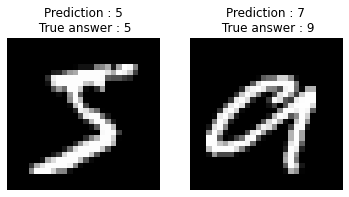

In [13]:
prediction = np.round(model_down.predict(X_train))
wrong_predictions = np.where(prediction != Y_train)[0]
correct_predictions = np.where(prediction == Y_train)[0]
img = X_train.reshape(-1,28,28)

plt.subplot(121)
plt.imshow(img[correct_predictions[0]], cmap = 'gray')
plt.title('Prediction : '+ str(np.argmax(prediction[correct_predictions[0]]))+
          '\n True answer : '+ str(np.argmax(Y_train[correct_predictions[0]])))
plt.axis('off') 

plt.subplot(122)
plt.imshow(img[wrong_predictions[0]], cmap = 'gray')
plt.title('Prediction : '+ str(np.argmax(prediction[wrong_predictions[0]]))+
          '\n True answer : '+ str(np.argmax(Y_train[wrong_predictions[0]])))
plt.axis('off') 

In [14]:
#supervised model
model_super = Sequential()

model_super.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2),activation='relu', padding='same',
                  kernel_initializer='random_normal',input_shape=(28,28,1)))
model_super.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_super.add(Conv2D(32, kernel_size=(3, 3),strides=(1, 1), activation='relu', padding='same',
                  kernel_initializer='random_normal'))
model_super.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model_super.add(Flatten())
model_super.add(Dense(10, activation='softmax',kernel_initializer='random_normal'))

model_super.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [15]:
model_super.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
hist_super= model_super.fit(X_train, Y_train, batch_size = 64, validation_split = split, 
                  epochs = 50,verbose = 0, callbacks = callback)

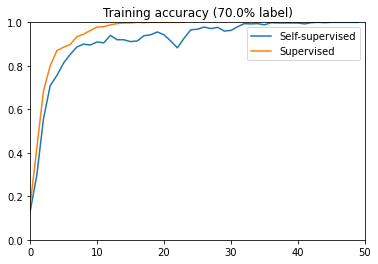

In [16]:
plt.plot(range(len(hist_down.history['accuracy'])), hist_down.history['accuracy'], label='Self-supervised')
plt.plot(range(len(hist_super.history['accuracy'])), hist_super.history['accuracy'], label='Supervised')

plt.xlim([0, 50])
plt.ylim([0, 1])
plt.title('Training accuracy (' +str(round((1-split)*100,1))+ '% label)')
plt.legend()
plt.show()

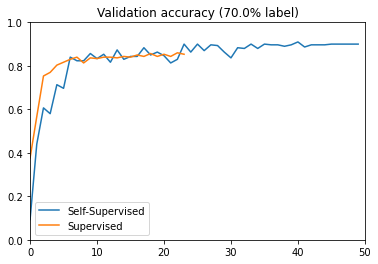

In [17]:
if split == 0:
    print(" 100% labeled data is using for training")
    
else:
    plt.plot(range(len(hist_down.history['accuracy'])), hist_down.history['val_accuracy'], label='Self-Supervised')
    plt.plot(range(len(hist_super.history['accuracy'])), hist_super.history['val_accuracy'], label='Supervised')
    plt.xlim([0, 50])
    plt.ylim([0, 1])
    plt.title('Validation accuracy (' +str(round((1-split)*100,1))+ '% label)')
    plt.legend()
    plt.show()
    

In [18]:
eval_self = model_down.evaluate(X_test,Y_test,batch_size = 64,steps =10,verbose = 2)


10/10 - 0s - loss: 2.2839 - accuracy: 0.8933 - 435ms/epoch - 43ms/step


In [19]:
eval_super = model_super.evaluate(X_test,Y_test,batch_size = 64,steps =10, verbose = 2)


10/10 - 0s - loss: 0.5913 - accuracy: 0.8600 - 67ms/epoch - 7ms/step


Prediction by self-supervise learning :  [7 2 1 0 4 1 4 9 5 9]

Prediction by supervised learning     :  [7 2 1 0 4 1 4 9 5 9]

True answer                           :  [7 2 1 0 4 1 4 9 5 9]


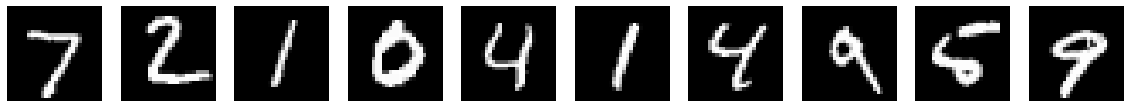

In [20]:
img = X_test.reshape(-1,28,28)
img.shape

prediction_self = np.argmax(model_down.predict(X_test),axis=1)
prediction_super = np.argmax(model_super.predict(X_test),axis=1)

plt.figure(figsize=(20,25))   
for n in range(10):
    
   
  plt.subplot(1,10,n+1)
  plt.imshow(img[n], cmap = 'gray')
  plt.axis('off') 

print('Prediction by self-supervise learning : ', prediction_self[0:10])
print('\nPrediction by supervised learning     : ', prediction_super[0:10])
print('\nTrue answer                           : ',np.argmax(Y_test[0:10],axis=1))